# Grocery Store Forecasting Challenge For Azubian

## `Business Understanding`

### Importance of Sales Forecasting

 1. Sales forecasting is crucial for businesses as it forms the foundation of their financial planning. Why doest it matter?
 2. Financial Planning: Sales forecasts help in creating profit and loss statements, cash flow projections, and balance sheets, aiding in setting financial goals for the company.
 3. Optimized Inventory Management: Accurate forecasts ensure that businesses have the right amount of stock at all times, reducing the risk of overstocking or stockouts, which can lead to wastage or lost sales opportunities.
 4. Informed Decision Making: Forecasting enables informed decision-making, such as determining how much stock to order per week or per month, thereby optimizing resource allocation and maximizing profitability.

### Objective / Goal
- The objective of the Grocery Store Forecasting Challenge for Azubian is to develop a model to forecast the number of products purchased per week per store over the next eight weeks. Key points include:

### Target Audience: 
- Small chain grocery stores seeking to optimize their inventory management processes.

### Data Overview: 
- The dataset comprises transaction information for 54 different stores and 33 product categories over a period of 3 years and 6 months.


### Variable Definitions

 - Target: Total sales for a product category at a specific store on a given date.
 - Store_id: Unique identifier for each store.
 - Category_id: Unique identifier for each product category.
 - Date: Date represented in numerical format.
 - Onpromotion: Total number of promoted items in a product category at a store on a given date.
 - Nbr_of_transactions: Total number of transactions that occurred at a store on a given date.
 - year_weekofyear: Combination of the year and the week of the year (year_weekofyear = year * 100 + week_of_year).
 - ID: Unique identifier for each row in the testing set, formatted as year_week_{year_weekofyear}{store_id}{Category_id}.


# Hypothesis
 
 Null Hypothesis: The type of holiday does not have any significant on the increase of sales
 
 Alternative Hypothesis: The type of holiday has significant impact on the increase in sales

# Business Questions

1. What is the distribution of sales?
2. What is the average sales for each category?
3. How do sales vary by promotion status?
4. Is there a relationship between sales and the number of transactions?
5. How do sales vary during holidays compared to non-holidays?
6. How do sales vary by holiday type?
7. What is the trend in sales over time?
8. How does sales vary across different store IDs?
9. Are there any seasonal patterns in sales?
10. How do sales vary across different combinations of category and promotion?

# `Data Understanding`

### Imporatation 

In [83]:
# Standard Library Imports
import datetime as dt
import os
import pickle
import warnings

# Third-Party Imports
import joblib
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import scipy.stats as stats
from babel.numbers import format_currency
from forex_python.converter import CurrencyRates
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from IPython.display import display
from scipy import stats
from scipy.stats import mode, shapiro, ttest_ind, trim_mean
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor, RandomForestClassifier, RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (accuracy_score, classification_report, f1_score, mean_absolute_error, mean_squared_error,
                             mean_squared_log_error, precision_score, recall_score, roc_auc_score, roc_curve)
from sklearn.model_selection import GridSearchCV, KFold, RandomizedSearchCV, StratifiedKFold, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Binarizer, FunctionTransformer, LabelEncoder, MinMaxScaler, OneHotEncoder, RobustScaler, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller, kpss
from xgboost import XGBRegressor
from pmdarima import auto_arima

# Local Imports (if any)

# Set warning filters
warnings.filterwarnings('ignore')


## `Loading Data`

In [84]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
stores = pd.read_csv("stores.csv")
sample = pd.read_csv("SampleSubmission.csv")
dates = pd.read_csv("dates.csv")
holidays = pd.read_csv("holidays.csv")

## `Exploratory Data Analysis: EDA`

In [85]:
# Display null values

for name, data in zip(["train", "test", "stores", "holidays", "dates"], [train, test, stores, holidays, dates]):
    print(f"Displaying null values in {name} data:")
    display(data.isnull().sum())
    print("=" * 50)

# Display shape

for name, data in zip(["train", "test", "stores", "holidays", "dates"], [train, test, stores, holidays, dates]):
    print(f"Displaying shape of {name} data: {data.shape}")
    print("=" * 50)


Displaying null values in train data:


date                   0
store_id               0
category_id            0
target                 0
onpromotion            0
nbr_of_transactions    0
dtype: int64

Displaying null values in test data:


date           0
store_id       0
category_id    0
onpromotion    0
dtype: int64

Displaying null values in stores data:


store_id    0
city        0
type        0
cluster     0
dtype: int64

Displaying null values in holidays data:


date    0
type    0
dtype: int64

Displaying null values in dates data:


date                0
year                0
month               0
dayofmonth          0
dayofweek           0
dayofyear           0
weekofyear          0
quarter             0
is_month_start      0
is_month_end        0
is_quarter_start    0
is_quarter_end      0
is_year_start       0
is_year_end         0
year_weekofyear     0
dtype: int64

Displaying shape of train data: (1048575, 6)
Displaying shape of test data: (99792, 4)
Displaying shape of stores data: (54, 4)
Displaying shape of holidays data: (281, 2)
Displaying shape of dates data: (1320, 15)


In [86]:
# Display duplicates

for name, data in zip(["train", "test", "stores", "holidays", "dates"], [train, test, stores, holidays, dates]):
    print(f"Displaying duplicates in {name} data:")
    display(data[data.duplicated()])
    print("=" * 50)


Displaying duplicates in train data:


,date,store_id,category_id,target,onpromotion,nbr_of_transactions


Displaying duplicates in test data:


,date,store_id,category_id,onpromotion


Displaying duplicates in stores data:


,store_id,city,type,cluster


Displaying duplicates in holidays data:


,date,type
18,6/24/1900,0
19,6/24/1900,0
21,7/2/1900,0
69,6/23/1901,0
70,6/23/1901,0
77,7/1/1901,0
134,6/22/1902,0
135,6/22/1902,0
137,6/30/1902,0
200,5/5/1903,5


Displaying duplicates in dates data:


,date,year,month,dayofmonth,dayofweek,dayofyear,weekofyear,quarter,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,year_weekofyear


### Drop Duplicates 


In [87]:
# Remove duplicates

holidays.drop_duplicates(inplace=True)

# Display duplicates again to verify they have been removed
print("Displaying duplicates in holidays data after removal:")
display(holidays[holidays.duplicated()])
print("=" * 50)


Displaying duplicates in holidays data after removal:


,date,type


In [88]:
# Display summaries

for name, data in zip(["train", "test", "stores", "holidays", "dates"], [train, test, stores, holidays, dates]):
    print(f"Displaying summary of {name} data:")
    display(data.describe().T)
    print("=" * 50)


Displaying summary of train data:


,count,mean,std,min,25%,50%,75%,max
target,1048575.0,323.882763,993.891657,0.0,0.0,7.0,180.0,45361.0
onpromotion,1048575.0,0.921119,6.755449,0.0,0.0,0.0,0.0,213.0
nbr_of_transactions,1048575.0,1538.672352,1075.101328,0.0,894.0,1337.0,2008.0,8120.0


Displaying summary of test data:


,count,mean,std,min,25%,50%,75%,max
onpromotion,99792.0,7.274892,18.504041,0.0,0.0,0.0,6.0,591.0


Displaying summary of stores data:


,count,mean,std,min,25%,50%,75%,max
city,54.0,6.981481,6.945857,0.0,0.0,6.5,11.75,21.0
type,54.0,1.592593,1.447425,0.0,0.0,2.0,2.00,4.0
cluster,54.0,7.296296,4.700982,0.0,4.0,7.0,11.00,16.0


Displaying summary of holidays data:


,count,mean,std,min,25%,50%,75%,max
type,264.0,1.473485,2.016863,0.0,0.0,0.0,2.0,5.0


Displaying summary of dates data:


,count,mean,std,min,25%,50%,75%,max
year,1320.0,2.344697,1.059333,1.0,1.00,2.0,3.00,4.0
month,1320.0,6.124242,3.366835,1.0,3.00,6.0,9.00,12.0
dayofmonth,1320.0,15.612121,8.798020,1.0,8.00,15.5,23.00,31.0
dayofweek,1320.0,2.996970,2.001135,0.0,1.00,3.0,5.00,6.0
dayofyear,1320.0,170.871970,102.870939,1.0,83.00,165.5,255.00,366.0
weekofyear,1320.0,24.934848,14.726066,1.0,12.00,24.0,37.00,53.0
quarter,1320.0,2.384091,1.094568,1.0,1.00,2.0,3.00,4.0
year_weekofyear,1320.0,259.101515,104.162039,101.0,147.75,243.0,337.25,433.0


# `Data Cleaning`

### Store Data

In [89]:


stores['cluster'] = stores['cluster'].map(lambda x: 'cluster_' + str(x))  # Convert cluster numbers to cluster names
stores['type'] = stores['type'].map(lambda x: 'store_' + str(x))  # Convert store_type numbers to store_type names
stores['city'] = stores['city'].map(lambda x: 'city_' + str(x))  # Convert city numbers to city names

# Display unique values after conversion
print("Unique clusters:", stores['cluster'].unique())
print("Unique store types:", stores['type'].unique())
print("Unique cities:", stores['city'].unique())


Unique clusters: ['cluster_0' 'cluster_1' 'cluster_2' 'cluster_3' 'cluster_4' 'cluster_5'
 'cluster_6' 'cluster_7' 'cluster_8' 'cluster_9' 'cluster_10' 'cluster_11'
 'cluster_12' 'cluster_13' 'cluster_14' 'cluster_15' 'cluster_16']
Unique store types: ['store_0' 'store_1' 'store_2' 'store_3' 'store_4']
Unique cities: ['city_0' 'city_1' 'city_2' 'city_3' 'city_4' 'city_5' 'city_6' 'city_7'
 'city_8' 'city_9' 'city_10' 'city_11' 'city_12' 'city_13' 'city_14'
 'city_15' 'city_16' 'city_17' 'city_18' 'city_19' 'city_20' 'city_21']


In [90]:
# rename type to store_type to make it more descriptive

stores.rename(columns={'type': 'store_type'}, inplace=True)

### Dates

- The dayofyear column in our dates dataset ranges from 1 to 366. This will make some days fall on the wrong number
Solution: find the sine and cosine of this column to represent the cyclic nature of a year. We can also include weather conditions, holidays and events to this.

In [91]:

# Create new columns for cyclic nature of year
dates["sin(dayofyear)"] = np.sin(2 * np.pi * dates["dayofyear"] / 365)
dates["cos(dayofyear)"] = np.cos(2 * np.pi * dates["dayofyear"] / 365)

# Function to extract datetime
def get_datetime(df):
    df['date_extracted'] = (
        df['year'].add(1900).astype(str) + '-' +
        df['month'].astype(str).str.zfill(2) + '-' +
        df['dayofmonth'].astype(str).str.zfill(2)
    )

get_datetime(dates)

# Display the first few rows of the modified DataFrame
dates.head()


,date,year,month,dayofmonth,dayofweek,dayofyear,weekofyear,quarter,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,year_weekofyear,sin(dayofyear),cos(dayofyear),date_extracted
0,12/30/1900,1,1,1,2,1,1,1,True,False,True,False,True,False,101,0.017213,0.999852,1901-01-01
1,12/31/1900,1,1,2,3,2,1,1,False,False,False,False,False,False,101,0.034422,0.999407,1901-01-02
2,1/1/1901,1,1,3,4,3,1,1,False,False,False,False,False,False,101,0.051620,0.998667,1901-01-03
3,1/2/1901,1,1,4,5,4,1,1,False,False,False,False,False,False,101,0.068802,0.997630,1901-01-04
4,1/3/1901,1,1,5,6,5,1,1,False,False,False,False,False,False,101,0.085965,0.996298,1901-01-05


### Holiday 


In [92]:
# make each holiday type a string

holidays['type'] = holidays['type'].apply(lambda x: 'holiday_' + str(x))

holidays['type'].value_counts()

type
holiday_0    154
holiday_5     55
holiday_2     38
holiday_1      9
holiday_4      5
holiday_3      3
Name: count, dtype: int64

In [93]:
# rename type to holiday_type to make it more descriptive

holidays.rename( columns={'type': 'holiday_type'}, inplace=True)


In [94]:
def get_is_holiday_column(holidays):
  holidays['holiday_type'] = holidays['holiday_type'].fillna('Workday')

  # create column to show if its a holiday or not (non-holidays are zeros)
  holidays['is_holiday'] = holidays['holiday_type'].apply(
      lambda x: False if x=='Workday'
      else True)

# `Merge The Data Sets`

In [95]:
holidays.head()

,date,holiday_type
0,1/1/1900,holiday_0
1,1/5/1900,holiday_4
2,1/12/1900,holiday_4
3,2/11/1900,holiday_0
4,2/12/1900,holiday_0


In [96]:
stores.head()

,store_id,city,store_type,cluster
0,store_1,city_0,store_0,cluster_0
1,store_2,city_0,store_0,cluster_0
2,store_3,city_0,store_0,cluster_1
3,store_4,city_0,store_0,cluster_2
4,store_5,city_1,store_0,cluster_3


In [97]:
dates.head()

,date,year,month,dayofmonth,dayofweek,dayofyear,weekofyear,quarter,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,year_weekofyear,sin(dayofyear),cos(dayofyear),date_extracted
0,12/30/1900,1,1,1,2,1,1,1,True,False,True,False,True,False,101,0.017213,0.999852,1901-01-01
1,12/31/1900,1,1,2,3,2,1,1,False,False,False,False,False,False,101,0.034422,0.999407,1901-01-02
2,1/1/1901,1,1,3,4,3,1,1,False,False,False,False,False,False,101,0.051620,0.998667,1901-01-03
3,1/2/1901,1,1,4,5,4,1,1,False,False,False,False,False,False,101,0.068802,0.997630,1901-01-04
4,1/3/1901,1,1,5,6,5,1,1,False,False,False,False,False,False,101,0.085965,0.996298,1901-01-05


In [98]:
train.head()

,date,store_id,category_id,target,onpromotion,nbr_of_transactions
0,12/30/1900,store_1,category_24,0.0,0,0
1,12/30/1900,store_1,category_21,0.0,0,0
2,12/30/1900,store_1,category_32,0.0,0,0
3,12/30/1900,store_1,category_18,0.0,0,0
4,12/30/1900,store_1,category_26,0.0,0,0


### Train Data Merged 

In [99]:
#merging train and test with stores dataset

def merge(df1, df2):
    merged_df = df1.merge(df2, how='left', on='date')

    return merged_df

def merge_stores(df1, df2):
    merged_df = df1.merge(df2, how='left', on='store_id')

    return merged_df

In [100]:
# Merge train with stores
train_merged = merge_stores(train, stores)

# Merge the result with holidays
train_merged1 = merge(train_merged, holidays)

get_is_holiday_column(train_merged1)

# Merge the result with dates
train_merged2 = merge(train_merged1, dates)

train_merged2.head()

,date,store_id,category_id,target,onpromotion,nbr_of_transactions,city,store_type,cluster,holiday_type,...,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,year_weekofyear,sin(dayofyear),cos(dayofyear),date_extracted
0,12/30/1900,store_1,category_24,0.0,0,0,city_0,store_0,cluster_0,holiday_0,...,True,False,True,False,True,False,101,0.017213,0.999852,1901-01-01
1,12/30/1900,store_1,category_21,0.0,0,0,city_0,store_0,cluster_0,holiday_0,...,True,False,True,False,True,False,101,0.017213,0.999852,1901-01-01
2,12/30/1900,store_1,category_32,0.0,0,0,city_0,store_0,cluster_0,holiday_0,...,True,False,True,False,True,False,101,0.017213,0.999852,1901-01-01
3,12/30/1900,store_1,category_18,0.0,0,0,city_0,store_0,cluster_0,holiday_0,...,True,False,True,False,True,False,101,0.017213,0.999852,1901-01-01
4,12/30/1900,store_1,category_26,0.0,0,0,city_0,store_0,cluster_0,holiday_0,...,True,False,True,False,True,False,101,0.017213,0.999852,1901-01-01


In [101]:
# Convert the column to datetime with errors='coerce'
train_merged2['date_ext'] = pd.to_datetime(train_merged2['date_extracted'], errors='coerce')

# Filter rows with NaT values and convert them to a list
invalid_dates = train_merged2.loc[train_merged2['date_ext'].isna(), 'date_extracted'].tolist()

# Print the list of invalid dates and unique invalid dates
print(invalid_dates) # get a list of invalid dates
print(list(set(invalid_dates))) # unique invalid dates

# Drop the temporary 'date_ext' column
train_merged2.drop('date_ext', axis=1, inplace=True)

[]
[]


In [102]:
train_merged2.head()

,date,store_id,category_id,target,onpromotion,nbr_of_transactions,city,store_type,cluster,holiday_type,...,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,year_weekofyear,sin(dayofyear),cos(dayofyear),date_extracted
0,12/30/1900,store_1,category_24,0.0,0,0,city_0,store_0,cluster_0,holiday_0,...,True,False,True,False,True,False,101,0.017213,0.999852,1901-01-01
1,12/30/1900,store_1,category_21,0.0,0,0,city_0,store_0,cluster_0,holiday_0,...,True,False,True,False,True,False,101,0.017213,0.999852,1901-01-01
2,12/30/1900,store_1,category_32,0.0,0,0,city_0,store_0,cluster_0,holiday_0,...,True,False,True,False,True,False,101,0.017213,0.999852,1901-01-01
3,12/30/1900,store_1,category_18,0.0,0,0,city_0,store_0,cluster_0,holiday_0,...,True,False,True,False,True,False,101,0.017213,0.999852,1901-01-01
4,12/30/1900,store_1,category_26,0.0,0,0,city_0,store_0,cluster_0,holiday_0,...,True,False,True,False,True,False,101,0.017213,0.999852,1901-01-01


### Test Data Merged 

In [103]:
# Merge train with stores
test_merged = merge_stores(test, stores)

# Merge the result with holidays
test_merged1 = merge(test_merged, holidays)

get_is_holiday_column(test_merged1)


# Merge the result with dates
test_merged2 = merge(test_merged1, dates)

test_merged2.head()

,date,store_id,category_id,onpromotion,city,store_type,cluster,holiday_type,is_holiday,year,...,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,year_weekofyear,sin(dayofyear),cos(dayofyear),date_extracted
0,6/14/1904,store_1,category_24,0,city_0,store_0,cluster_0,Workday,False,4,...,False,False,False,False,False,False,425,0.213521,-0.976938,1904-06-19
1,6/14/1904,store_1,category_21,0,city_0,store_0,cluster_0,Workday,False,4,...,False,False,False,False,False,False,425,0.213521,-0.976938,1904-06-19
2,6/14/1904,store_1,category_32,0,city_0,store_0,cluster_0,Workday,False,4,...,False,False,False,False,False,False,425,0.213521,-0.976938,1904-06-19
3,6/14/1904,store_1,category_18,16,city_0,store_0,cluster_0,Workday,False,4,...,False,False,False,False,False,False,425,0.213521,-0.976938,1904-06-19
4,6/14/1904,store_1,category_26,0,city_0,store_0,cluster_0,Workday,False,4,...,False,False,False,False,False,False,425,0.213521,-0.976938,1904-06-19


In [104]:
train_merged2['date_extracted'] = pd.to_datetime(train_merged2['date_extracted'], errors='coerce')

test_merged2['date_extracted'] = pd.to_datetime(test_merged2['date_extracted'])

train_merged2['date_extracted'].fillna('1903-02-29')



0         1901-01-01
1         1901-01-01
2         1901-01-01
3         1901-01-01
4         1901-01-01
             ...    
1053916   1902-08-13
1053917   1902-08-13
1053918   1902-08-13
1053919   1902-08-13
1053920   1902-08-13
Name: date_extracted, Length: 1053921, dtype: datetime64[ns]

In [105]:


# Create a complete date range from the first to the last date in the 'date_extracted' column
date_range = pd.date_range(start=train_merged2['date_extracted'].min(), end=train_merged2['date_extracted'].max())

# Find missing dates by comparing the complete date range with existing dates in the 'date_extracted' column
missing_dates = date_range[~date_range.isin(train_merged2['date_extracted'])]

print("Missing dates:")
print(missing_dates)


Missing dates:
DatetimeIndex(['1901-12-25'], dtype='datetime64[ns]', freq='D')


In [106]:
# Create a complete date range from the first to the last date in the 'date_extracted' column
date_range = pd.date_range(start=test_merged2['date_extracted'].min(), end=test_merged2['date_extracted'].max())

# Find missing dates by comparing the complete date range with existing dates in the 'date_extracted' column
missing_dates = date_range[~date_range.isin(test_merged2['date_extracted'])]

print("Missing dates:")
print(missing_dates)


Missing dates:
DatetimeIndex([], dtype='datetime64[ns]', freq='D')


## Setting the date as Index is always good practice for Time series 

In [107]:
# Define a function to drop duplicates and set the date column as the index
def set_index(df):
    # Drop the 'date' column
    df.drop('date', inplace=True, axis=1)
    # Set the 'date_extracted' column as the index
    df.set_index('date_extracted', inplace=True)

# Apply the set_index function to train_merged2 and test_merged2
set_index(train_merged2)
set_index(test_merged2)


In [108]:
train_merged2.head()

,store_id,category_id,target,onpromotion,nbr_of_transactions,city,store_type,cluster,holiday_type,is_holiday,...,quarter,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,year_weekofyear,sin(dayofyear),cos(dayofyear)
date_extracted,,,,,,,,,,,,,,,,,,,,,
1901-01-01,store_1,category_24,0.0,0,0,city_0,store_0,cluster_0,holiday_0,True,...,1,True,False,True,False,True,False,101,0.017213,0.999852
1901-01-01,store_1,category_21,0.0,0,0,city_0,store_0,cluster_0,holiday_0,True,...,1,True,False,True,False,True,False,101,0.017213,0.999852
1901-01-01,store_1,category_32,0.0,0,0,city_0,store_0,cluster_0,holiday_0,True,...,1,True,False,True,False,True,False,101,0.017213,0.999852
1901-01-01,store_1,category_18,0.0,0,0,city_0,store_0,cluster_0,holiday_0,True,...,1,True,False,True,False,True,False,101,0.017213,0.999852
1901-01-01,store_1,category_26,0.0,0,0,city_0,store_0,cluster_0,holiday_0,True,...,1,True,False,True,False,True,False,101,0.017213,0.999852


# Renaming The Dataset 

In [109]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   date                 1048575 non-null  object 
 1   store_id             1048575 non-null  object 
 2   category_id          1048575 non-null  object 
 3   target               1048575 non-null  float64
 4   onpromotion          1048575 non-null  int64  
 5   nbr_of_transactions  1048575 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 48.0+ MB


In [110]:
train = train_merged2
test = test_merged2

In [111]:
print(train.isnull().sum())
print(test.isnull().sum())

store_id               0
category_id            0
target                 0
onpromotion            0
nbr_of_transactions    0
city                   0
store_type             0
cluster                0
holiday_type           0
is_holiday             0
year                   0
month                  0
dayofmonth             0
dayofweek              0
dayofyear              0
weekofyear             0
quarter                0
is_month_start         0
is_month_end           0
is_quarter_start       0
is_quarter_end         0
is_year_start          0
is_year_end            0
year_weekofyear        0
sin(dayofyear)         0
cos(dayofyear)         0
dtype: int64
store_id            0
category_id         0
onpromotion         0
city                0
store_type          0
cluster             0
holiday_type        0
is_holiday          0
year                0
month               0
dayofmonth          0
dayofweek           0
dayofyear           0
weekofyear          0
quarter             0
is_mont

In [112]:
def add_time_features(df):
    train.index = pd.to_datetime(train.index)  # Convert index to datetime if not already in datetime format
    df['week'] = train.index.isocalendar().week

add_time_features(train_merged2)


In [113]:
def add_time_features(df):
    test.index = pd.to_datetime(test.index)  # Convert index to datetime if not already in datetime format
    df['week'] = test.index.isocalendar().week

add_time_features(test_merged2)


# Analytic Question 

## 1. What is the distribution of sales?

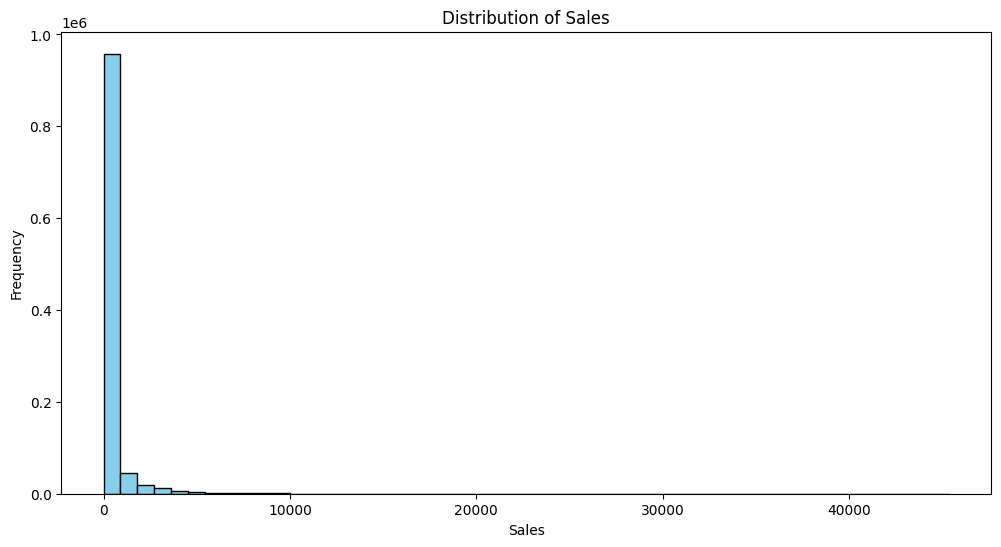

In [114]:

# Plot a histogram of the 'sales' column
plt.figure(figsize=(12, 6))
plt.hist(train['target'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Sales')
plt.show()


## 2. Are there any seasonal patterns in sales?

<Figure size 1200x800 with 0 Axes>

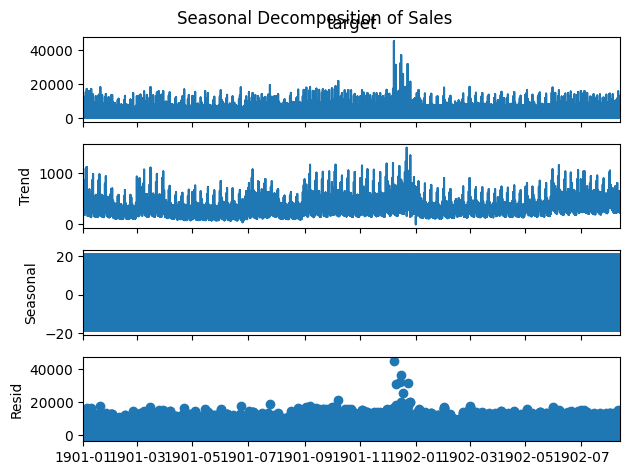

In [115]:

# Perform seasonal decomposition on the 'sales' column
decomposition = seasonal_decompose(train['target'], period=365)

# Plot the seasonal decomposition
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.suptitle('Seasonal Decomposition of Sales')
plt.show()



## 3. What is the average sales for each category?


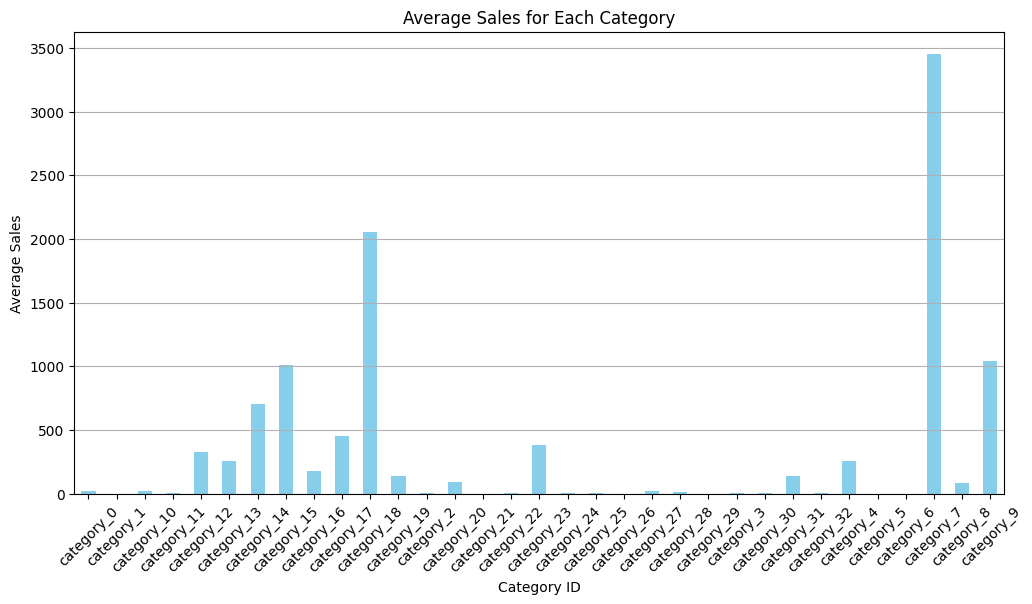

In [116]:
# Calculate the average sales for each category
average_sales_per_category = train.groupby('category_id')['target'].mean()

# Plot the average sales for each category
plt.figure(figsize=(12, 6))
average_sales_per_category.plot(kind='bar', color='skyblue')
plt.xlabel('Category ID')
plt.ylabel('Average Sales')
plt.title('Average Sales for Each Category')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


## 4. How do sales vary by promotion status?


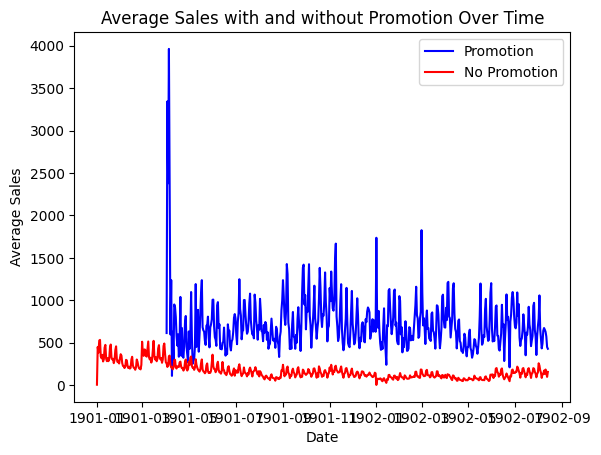

In [117]:
# Separate data for promotion and non-promotion
promotion_data = train[train['onpromotion'] == 1]
non_promotion_data = train[train['onpromotion'] == 0]

# Calculate average sales per day for promotion and non-promotion
promotion_avg_sales = promotion_data.groupby(promotion_data.index)['target'].mean()
non_promotion_avg_sales = non_promotion_data.groupby(non_promotion_data.index)['target'].mean()

# Line plot of average sales with and without promotion
plt.plot(promotion_avg_sales.index, promotion_avg_sales, label='Promotion', color='blue')
plt.plot(non_promotion_avg_sales.index, non_promotion_avg_sales, label='No Promotion', color='red')
plt.xlabel('Date')
plt.ylabel('Average Sales')
plt.title('Average Sales with and without Promotion Over Time')
plt.legend()
plt.show()

## 5. Is there a relationship between sales and the number of transactions?


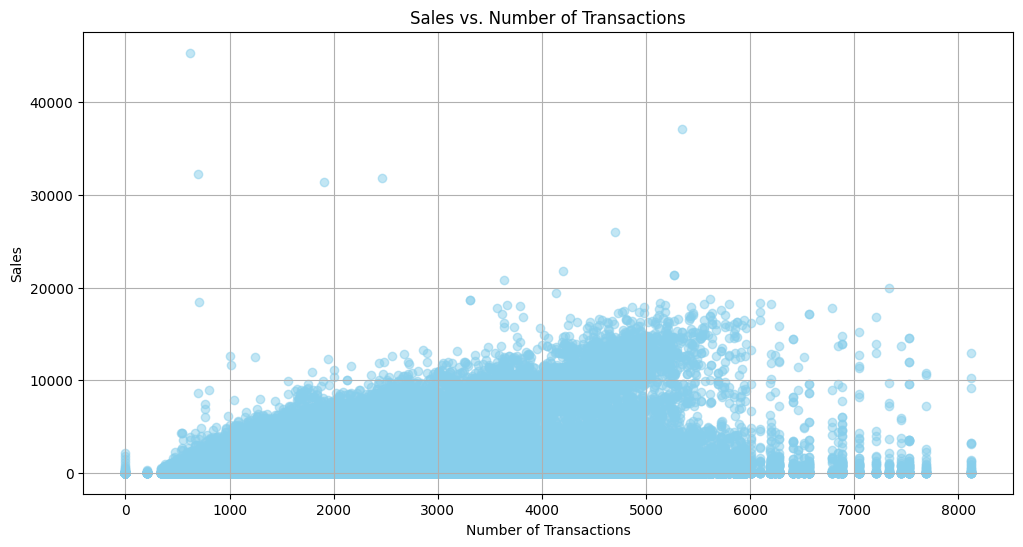

In [118]:
import matplotlib.pyplot as plt

# Plot a scatter plot of sales vs. number of transactions
plt.figure(figsize=(12, 6))
plt.scatter(train['nbr_of_transactions'], train['target'], color='skyblue', alpha=0.5)
plt.xlabel('Number of Transactions')
plt.ylabel('Sales')
plt.title('Sales vs. Number of Transactions')
plt.grid(True)
plt.show()


In [119]:
correlation_coefficient = train['target'].corr(train['nbr_of_transactions'])
print("Correlation Coefficient:", correlation_coefficient)

Correlation Coefficient: 0.24921203615612852


- The correlation coefficient between 'target' and 'nbr_of_transactions' is 0.24. This indicates a positive correlation between the two variables, but the correlation is relatively weak.
- It suggests that there is a weak tendency for the 'target' and 'nbr_of_transactions' to increase together, but the relationship is not very strong.
- Therefore, based on the correlation coefficient of 0.24, there is a weak positive correlation between the 'target' and 'nbr_of_transactions' columns in our dataset.

## 6. How do sales vary during holidays compared to non-holidays?


In [120]:
train['holiday_type'].value_counts()

holiday_type
Workday      898887
holiday_0     96228
holiday_5     32076
holiday_2     17820
holiday_4      3564
holiday_3      3564
holiday_1      1782
Name: count, dtype: int64

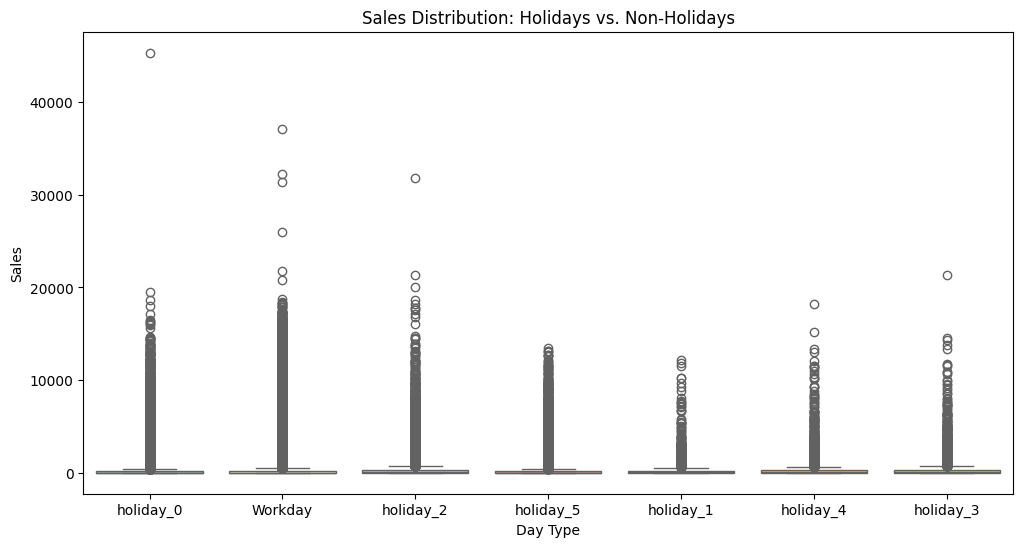

In [121]:

# Create a box plot to compare sales during holidays and non-holidays
plt.figure(figsize=(12, 6))
sns.boxplot(x='holiday_type', y='target', data=train, palette='Set3')
plt.xlabel('Day Type')
plt.ylabel('Sales')
plt.title('Sales Distribution: Holidays vs. Non-Holidays')
plt.show()



## 7. How does sales vary across different store IDs?



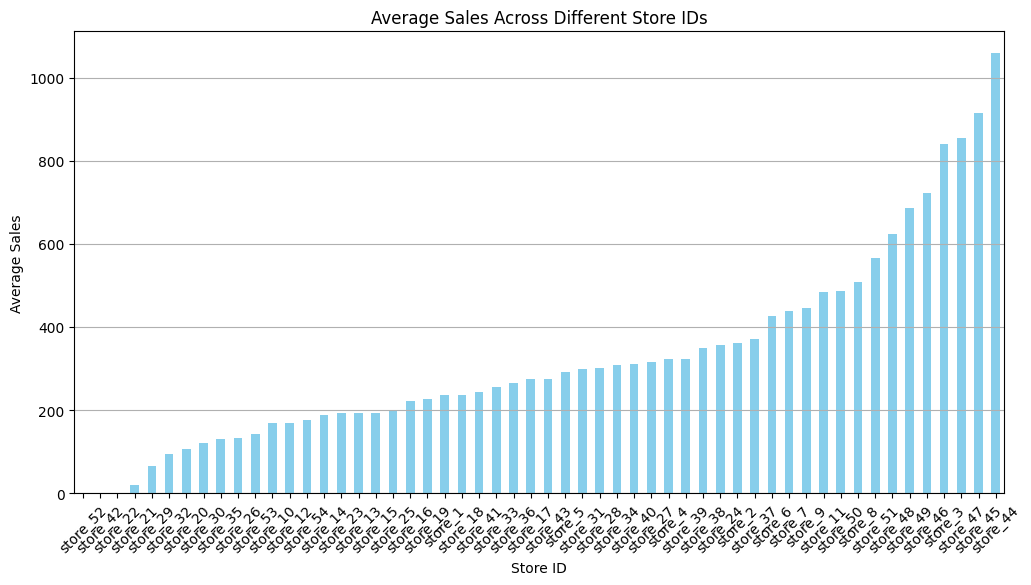

In [122]:

# Calculate the average sales for each store ID
average_sales_per_store = train.groupby('store_id')['target'].mean().sort_values()

# Plot the average sales for each store ID
plt.figure(figsize=(12, 6))
average_sales_per_store.plot(kind='bar', color='skyblue')
plt.xlabel('Store ID')
plt.ylabel('Average Sales')
plt.title('Average Sales Across Different Store IDs')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


## **7. What is the trend in sales over time?**

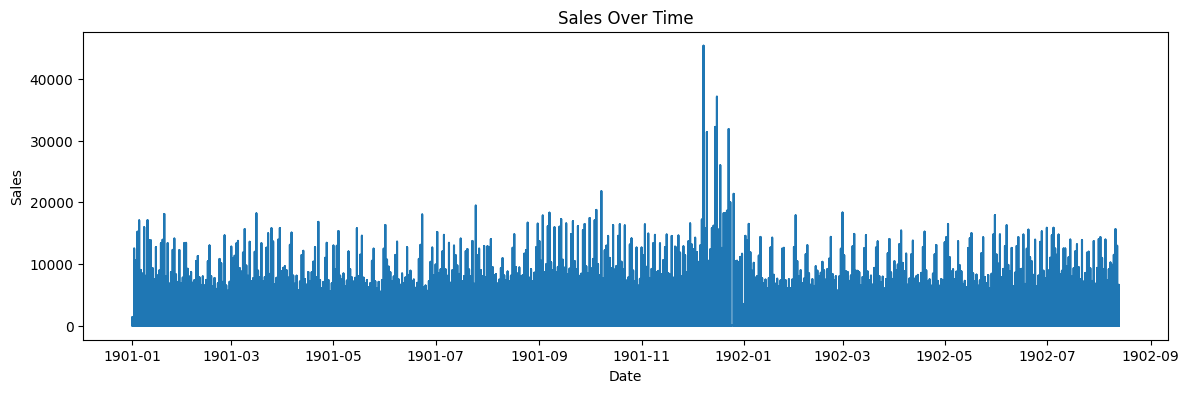

In [123]:
# Line plot of sales over time
plt.figure(figsize=(14, 4))  # Set the figure size
plt.plot(train.index, train['target'])  # Plotting the sales data
plt.xlabel('Date')  # Labeling the x-axis
plt.ylabel('Sales')  # Labeling the y-axis
plt.title('Sales Over Time')  # Setting the title
plt.show()  # Display the plot

## Resampling 

### Monthly Trend

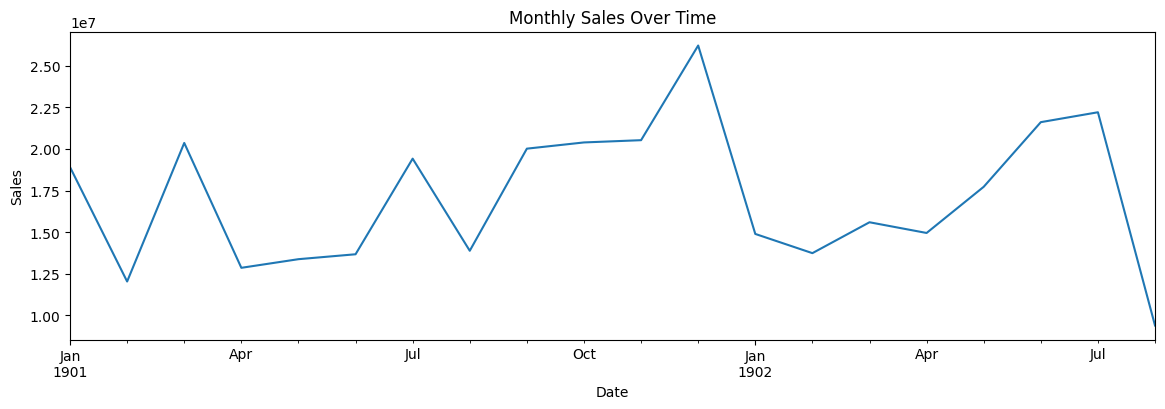

In [124]:
monthly_sales = train.resample('M')['target'].sum()
monthly_sales.plot(figsize=(14, 4))
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Monthly Sales Over Time')
plt.show()


### Weekly Trend

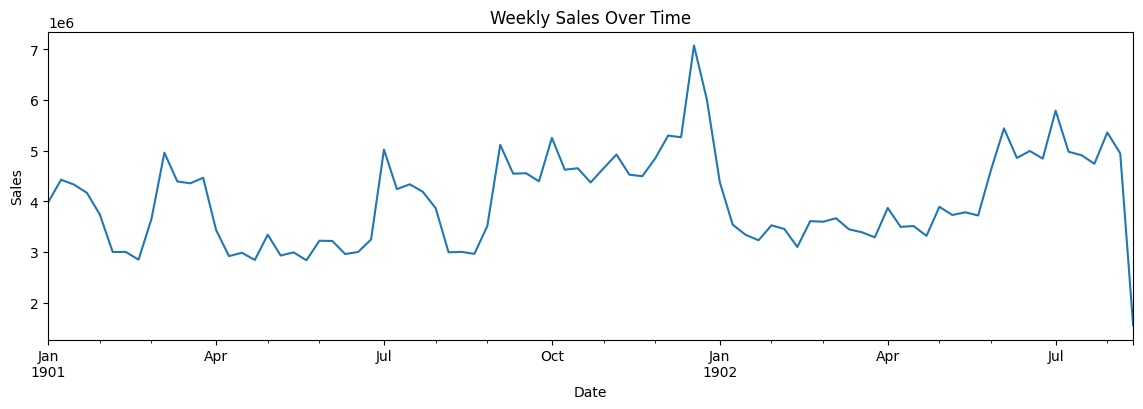

In [125]:
weekly_sales = train.resample('W')['target'].sum()
weekly_sales.plot(figsize=(14, 4))
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Weekly Sales Over Time')
plt.show()

- Observed values: These are the actual values of the time series. They represent the data points that are observed or recorded over a period of time. In the context of sales data, the observed values would be the actual sales figures recorded at different time intervals.

- Trend: The trend component represents the long-term pattern or direction of the time series. It captures the underlying growth or decline in the data over an extended period. The trend component helps identify whether the series is increasing, decreasing, or remaining relatively stable over time.

- Seasonal: The seasonal component represents the periodic patterns or fluctuations that occur within a time series. It captures the regular and repetitive variations that happen within specific time periods, such as daily, weekly, monthly, or yearly cycles. In sales data, seasonal patterns may include higher sales during holiday seasons or lower sales during certain months of the year.

- Residual: The residual component, also known as the irregular or random component, represents the remaining variation in the time series after removing the trend and seasonal components. It includes any unpredictable or random fluctuations that are not accounted for by the trend or seasonal patterns. The residual component is often assumed to be noise or measurement error.

### `Univariate Data Analysis`

<Figure size 1200x800 with 0 Axes>

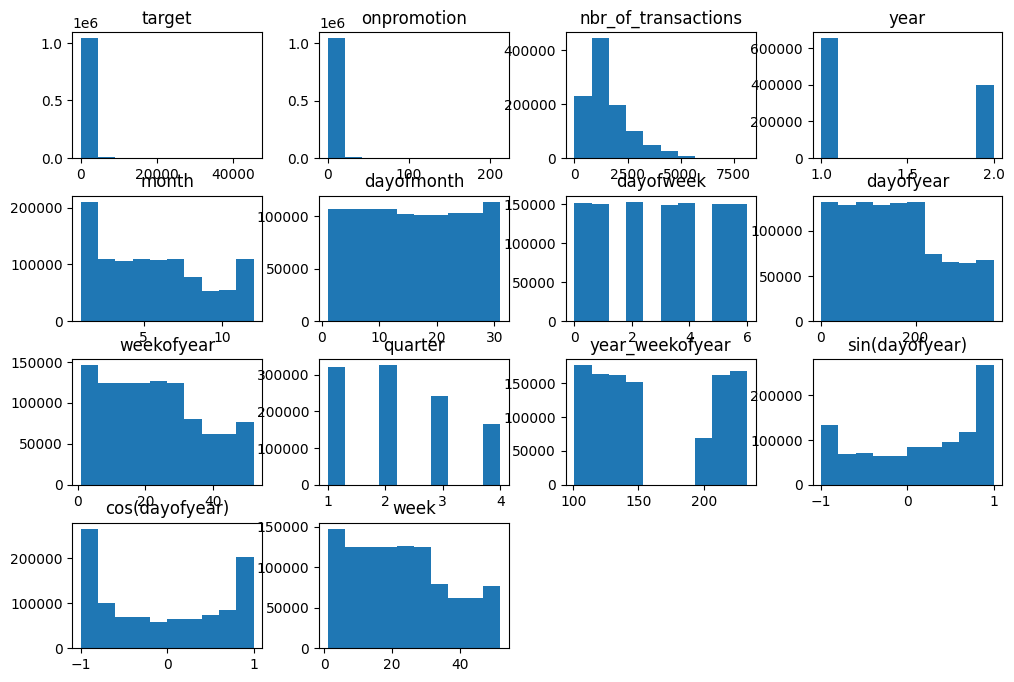

In [126]:
# Visualizing the distribution of Numerical Variables

plt.figure(figsize=(12, 8))
train.hist(figsize=(12,8), grid=False)
plt.title('Distribution of Numerical Variables')
histogram_fig = plt.gcf()

#### `Insights`
1. Distribution of Sales: The distribution of sales is skewed to the right, indicating that there are more sales with lower values than sales with higher values. This suggests that there are more transactions with lower sales amounts than transactions with higher sales amounts.
2. Average Sales by Category: The average sales per category vary significantly. This indicates that some categories are more popular or profitable than others. This information can be used to identify high-performing categories and focus marketing efforts on those categories.
3. Average Sales by Holiday Type: The average sales during holidays are higher compared to non-holidays. This suggests that holidays have a positive effect on sales. This information can be used to plan promotional offers and marketing campaigns during holiday seasons

### `Bivariate Analysis`

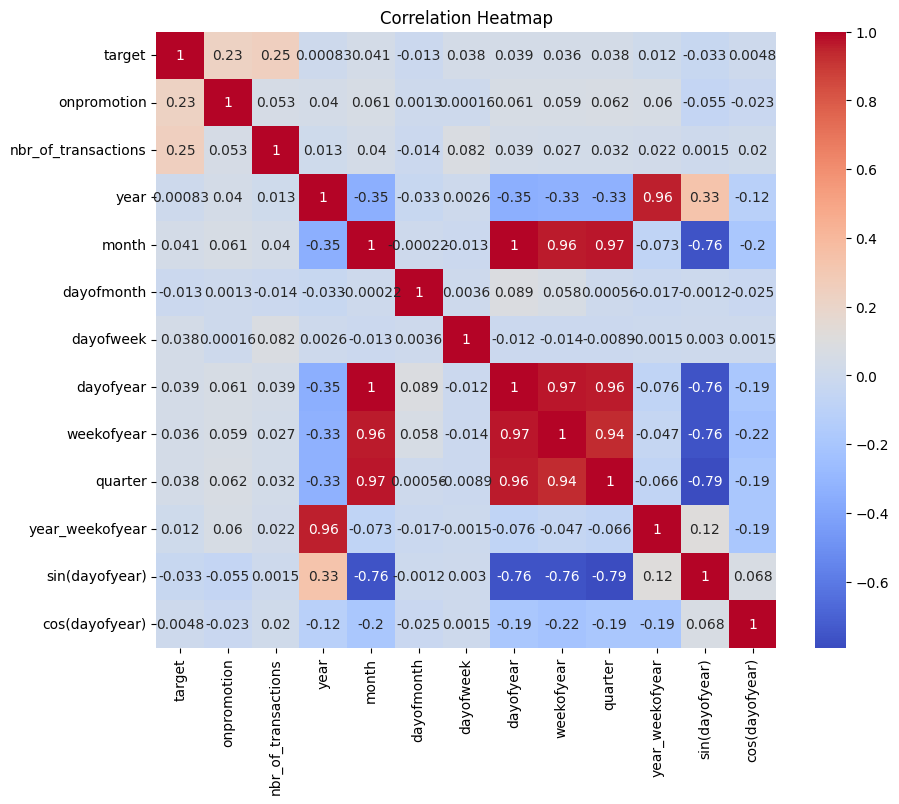

In [127]:
# Drop non-numeric columns if needed
numeric_df = train.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation Heatmap')
plt.show()

#### `Insights`
1. Promotion Effect: There is a weak positive correlation between the 'target' and 'nbr_of_transactions' columns, indicating that there is a weak tendency for the 'target' and 'nbr_of_transactions' to increase together. This suggests that promotions might have a positive effect on sales. This information can be used to plan promotional offers and marketing campaigns.
2. Holiday Effect: The average sales during holidays are higher compared to non-holidays. This suggests that holidays have a positive effect on sales. This information can be used to plan promotional offers and marketing campaigns during holiday seasons.
3. Store and Category Performance: The average sales per store and category vary significantly. This indicates that some stores and categories are more profitable than others. This information can be used to identify high-performing stores and categories and focus marketing efforts on those areas.

## `Data Preparation & Feature Engineering`

In [128]:
train.head()

,store_id,category_id,target,onpromotion,nbr_of_transactions,city,store_type,cluster,holiday_type,is_holiday,...,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,year_weekofyear,sin(dayofyear),cos(dayofyear),week
date_extracted,,,,,,,,,,,,,,,,,,,,,
1901-01-01,store_1,category_24,0.0,0,0,city_0,store_0,cluster_0,holiday_0,True,...,True,False,True,False,True,False,101,0.017213,0.999852,1
1901-01-01,store_1,category_21,0.0,0,0,city_0,store_0,cluster_0,holiday_0,True,...,True,False,True,False,True,False,101,0.017213,0.999852,1
1901-01-01,store_1,category_32,0.0,0,0,city_0,store_0,cluster_0,holiday_0,True,...,True,False,True,False,True,False,101,0.017213,0.999852,1
1901-01-01,store_1,category_18,0.0,0,0,city_0,store_0,cluster_0,holiday_0,True,...,True,False,True,False,True,False,101,0.017213,0.999852,1
1901-01-01,store_1,category_26,0.0,0,0,city_0,store_0,cluster_0,holiday_0,True,...,True,False,True,False,True,False,101,0.017213,0.999852,1


In [129]:
test.head()

,store_id,category_id,onpromotion,city,store_type,cluster,holiday_type,is_holiday,year,month,...,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,year_weekofyear,sin(dayofyear),cos(dayofyear),week
date_extracted,,,,,,,,,,,,,,,,,,,,,
1904-06-19,store_1,category_24,0,city_0,store_0,cluster_0,Workday,False,4,6,...,False,False,False,False,False,False,425,0.213521,-0.976938,24
1904-06-19,store_1,category_21,0,city_0,store_0,cluster_0,Workday,False,4,6,...,False,False,False,False,False,False,425,0.213521,-0.976938,24
1904-06-19,store_1,category_32,0,city_0,store_0,cluster_0,Workday,False,4,6,...,False,False,False,False,False,False,425,0.213521,-0.976938,24
1904-06-19,store_1,category_18,16,city_0,store_0,cluster_0,Workday,False,4,6,...,False,False,False,False,False,False,425,0.213521,-0.976938,24
1904-06-19,store_1,category_26,0,city_0,store_0,cluster_0,Workday,False,4,6,...,False,False,False,False,False,False,425,0.213521,-0.976938,24


In [130]:
# create column for sample subgmission id
train['id'] = [str(1900 + x) + '_' + str(y) + '_' + str(store_id) + '_' + str(category_id) 
                   for x, y, store_id, category_id in zip(train.year, train.week, train.store_id, train.category_id)]
train.head()

,store_id,category_id,target,onpromotion,nbr_of_transactions,city,store_type,cluster,holiday_type,is_holiday,...,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,year_weekofyear,sin(dayofyear),cos(dayofyear),week,id
date_extracted,,,,,,,,,,,,,,,,,,,,,
1901-01-01,store_1,category_24,0.0,0,0,city_0,store_0,cluster_0,holiday_0,True,...,False,True,False,True,False,101,0.017213,0.999852,1,1901_1_store_1_category_24
1901-01-01,store_1,category_21,0.0,0,0,city_0,store_0,cluster_0,holiday_0,True,...,False,True,False,True,False,101,0.017213,0.999852,1,1901_1_store_1_category_21
1901-01-01,store_1,category_32,0.0,0,0,city_0,store_0,cluster_0,holiday_0,True,...,False,True,False,True,False,101,0.017213,0.999852,1,1901_1_store_1_category_32
1901-01-01,store_1,category_18,0.0,0,0,city_0,store_0,cluster_0,holiday_0,True,...,False,True,False,True,False,101,0.017213,0.999852,1,1901_1_store_1_category_18
1901-01-01,store_1,category_26,0.0,0,0,city_0,store_0,cluster_0,holiday_0,True,...,False,True,False,True,False,101,0.017213,0.999852,1,1901_1_store_1_category_26


In [131]:
train.tail()

,store_id,category_id,target,onpromotion,nbr_of_transactions,city,store_type,cluster,holiday_type,is_holiday,...,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,year_weekofyear,sin(dayofyear),cos(dayofyear),week,id
date_extracted,,,,,,,,,,,,,,,,,,,,,
1902-08-13,store_3,category_23,929.36597,0,2953,city_0,store_0,cluster_1,Workday,False,...,False,False,False,False,False,233,-0.668064,-0.744104,33,1902_33_store_3_category_23
1902-08-13,store_3,category_20,274.99300,0,2953,city_0,store_0,cluster_1,Workday,False,...,False,False,False,False,False,233,-0.668064,-0.744104,33,1902_33_store_3_category_20
1902-08-13,store_3,category_15,6492.75600,0,2953,city_0,store_0,cluster_1,Workday,False,...,False,False,False,False,False,233,-0.668064,-0.744104,33,1902_33_store_3_category_15
1902-08-13,store_3,category_29,1.00000,0,2953,city_0,store_0,cluster_1,Workday,False,...,False,False,False,False,False,233,-0.668064,-0.744104,33,1902_33_store_3_category_29
1902-08-13,store_3,category_10,83.18300,0,2953,city_0,store_0,cluster_1,Workday,False,...,False,False,False,False,False,233,-0.668064,-0.744104,33,1902_33_store_3_category_10


In [132]:
# create column for sample subgmission id
test['id'] = [str(1900 + x) + '_' + str(y) + '_' + str(store_id) + '_' + str(category_id) 
                   for x, y, store_id, category_id in zip(test.year, test.week, test.store_id, test.category_id)]
test.head()

,store_id,category_id,onpromotion,city,store_type,cluster,holiday_type,is_holiday,year,month,...,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,year_weekofyear,sin(dayofyear),cos(dayofyear),week,id
date_extracted,,,,,,,,,,,,,,,,,,,,,
1904-06-19,store_1,category_24,0,city_0,store_0,cluster_0,Workday,False,4,6,...,False,False,False,False,False,425,0.213521,-0.976938,24,1904_24_store_1_category_24
1904-06-19,store_1,category_21,0,city_0,store_0,cluster_0,Workday,False,4,6,...,False,False,False,False,False,425,0.213521,-0.976938,24,1904_24_store_1_category_21
1904-06-19,store_1,category_32,0,city_0,store_0,cluster_0,Workday,False,4,6,...,False,False,False,False,False,425,0.213521,-0.976938,24,1904_24_store_1_category_32
1904-06-19,store_1,category_18,16,city_0,store_0,cluster_0,Workday,False,4,6,...,False,False,False,False,False,425,0.213521,-0.976938,24,1904_24_store_1_category_18
1904-06-19,store_1,category_26,0,city_0,store_0,cluster_0,Workday,False,4,6,...,False,False,False,False,False,425,0.213521,-0.976938,24,1904_24_store_1_category_26


# `Features Encoding & scaling`

In [133]:
numeric_columns = train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categoric_columns = [col for col in train.columns if col not in numeric_columns]
categoric_columns

['store_id',
 'category_id',
 'city',
 'store_type',
 'cluster',
 'holiday_type',
 'is_holiday',
 'is_month_start',
 'is_month_end',
 'is_quarter_start',
 'is_quarter_end',
 'is_year_start',
 'is_year_end',
 'week',
 'id']

In [134]:
numeric_columns.remove('target')
numeric_columns.remove('nbr_of_transactions')
# categoric_columns.remove('ID')
print(numeric_columns)

['onpromotion', 'year', 'month', 'dayofmonth', 'dayofweek', 'dayofyear', 'weekofyear', 'quarter', 'year_weekofyear', 'sin(dayofyear)', 'cos(dayofyear)']


In [135]:
from category_encoders import BinaryEncoder

encoder = BinaryEncoder(drop_invariant=False, return_df=True)
encoder.fit(train[categoric_columns])

BinaryEncoder(cols=['store_id', 'category_id', 'city', 'store_type', 'cluster',
                    'holiday_type', 'id'],
              mapping=[{'col': 'store_id',
                        'mapping':      store_id_0  store_id_1  store_id_2  store_id_3  store_id_4  store_id_5
 1            0           0           0           0           0           1
 2            0           0           0           0           1           0
 3            0           0           0           0           1           1
 4            0           0           0           1           0           0
 5            0           0           0           1           0           1
 6            0           0           0           1           1           0
 7            0           0           0           1           1           1
 8            0           0           1           0           0           0
 9            0           0           1           0           0           1
 10           0           0           1           0           1           0
 11           0           0           1           0           1           1
 12           0           0           1           1           0           0
 13           0           0           1           1           0           1
 14           0           0           1           1           1           0
 15           0           0           1           1           1           1
 16           0           1           0           0           0           0
 17           0           1           0           0           0           1
 18           0           1           0           0           1           0
 19           0           1           0           0           1           1
 20           0           1           0           1           0           0
 21           0           1           0           1...
 1          0     0     0     0     0     0     0     0     0     0      0   
 2          0     0     0     0     0     0     0     0     0     0      0   
 3          0     0     0     0     0     0     0     0     0     0      0   
 4          0     0     0     0     0     0     0     0     0     0      0   
 5          0     0     0     0     0     0     0     0     0     0      0   
...       ...   ...   ...   ...   ...   ...   ...   ...   ...   ...    ...   
 151468     1     0     0     1     0     0     1     1     1     1      1   
 151469     1     0     0     1     0     0     1     1     1     1      1   
 151470     1     0     0     1     0     0     1     1     1     1      1   
-1          0     0     0     0     0     0     0     0     0     0      0   
-2          0     0     0     0     0     0     0     0     0     0      0   

         id_11  id_12  id_13  id_14  id_15  id_16  id_17  
 1           0      0      0      0      0      0      1  
 2           0      0      0      0      0      1      0  
 3           0      0      0      0      0      1      1  
 4           0      0      0      0      1      0      0  
 5           0      0      0      0      1      0      1  
...        ...    ...    ...    ...    ...    ...    ...  
 151468      0      1      0      1      1      0      0  
 151469      0      1      0      1      1      0      1  
 151470      0      1      0      1      1      1      0  
-1           0      0      0      0      0      0      0  
-2           0      0      0      0      0      0      0  

[151472 rows x 18 columns]}])

In [136]:
# Initialize StandardScaler
scaler = StandardScaler()

# Set the output to be a DataFrame
scaler.set_output(transform="pandas")

# Fit the scaler to the numeric columns in the training data
scaler.fit(train[numeric_columns])

# Transform the numeric columns in the training and test data using the fitted scaler
scaled_num = scaler.transform(train[numeric_columns])
scaled_num_test = scaler.transform(test[numeric_columns])


In [137]:
# Transform the categorical columns in the training and test data using the fitted encoder
encoded_cat = encoder.transform(train[categoric_columns])
encoded_cat_test = encoder.transform(test[categoric_columns])


In [138]:
# Concatenate the scaled numerical features, encoded categorical features, and target variable for the training data
train = pd.concat([scaled_num, encoded_cat, train['target']], axis=1)

# Concatenate the scaled numerical features and encoded categorical features for the test data
test = pd.concat([scaled_num_test, encoded_cat_test], axis=1)


In [139]:
# Split the dataset into input features (x) and the target variable (y)
X = train.drop(['target'], axis=1)
y = train['target']


In [140]:
y.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 1053921 entries, 1901-01-01 to 1902-08-13
Series name: target
Non-Null Count    Dtype  
--------------    -----  
1053921 non-null  float64
dtypes: float64(1)
memory usage: 16.1 MB


In [141]:
X.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1053921 entries, 1901-01-01 to 1902-08-13
Data columns (total 65 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   onpromotion       1053921 non-null  float64
 1   year              1053921 non-null  float64
 2   month             1053921 non-null  float64
 3   dayofmonth        1053921 non-null  float64
 4   dayofweek         1053921 non-null  float64
 5   dayofyear         1053921 non-null  float64
 6   weekofyear        1053921 non-null  float64
 7   quarter           1053921 non-null  float64
 8   year_weekofyear   1053921 non-null  float64
 9   sin(dayofyear)    1053921 non-null  float64
 10  cos(dayofyear)    1053921 non-null  float64
 11  store_id_0        1053921 non-null  int64  
 12  store_id_1        1053921 non-null  int64  
 13  store_id_2        1053921 non-null  int64  
 14  store_id_3        1053921 non-null  int64  
 15  store_id_4        1053921 non-null

In [142]:
len(train)-len(test)

954129

In [143]:
# Split data into Train Test
# Assign the last len(test) rows of X and y to X_train and y_train, respectively
# Assign the remaining rows to X_test and y_test, respectively
X_train, X_test, y_train, y_test = X[len(train)-len(test):], X[:len(train)-len(test)], y[len(train)-len(test):], y[:len(train)-len(test)]


In [144]:
# Split data into Train Test
# Assign the last len(test) rows of X and y to X_train and y_train, respectively
# Assign the remaining rows to X_test and y_test, respectively
X_train, X_test, y_train, y_test = X[:-len(test)], X[-len(test):], y[:-len(test)], y[-len(test):]


In [145]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Initialize models
models = {
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor()
}

# Train and evaluate each model
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    print(f"Evaluating {name}...")
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)


    print(f"{name} - MSE: {mse}, MAE: {mae}")

# Select the best model based on evaluation metrics
# (e.g., lowest MSE or MAE)
best_model_name = min(models, key=lambda x: mean_squared_error(y_test, models[x].predict(X_test)))

# Use the best model for forecasting
best_model = models[best_model_name]
best_model.fit(X, y)  # Use the entire dataset for training



Training Decision Tree...


Evaluating Decision Tree...
Decision Tree - MSE: 155363.87872462854, MAE: 96.32728987225629
Training Random Forest...


In [ ]:
importances = []

for name, model in models.items():
    model.fit(X_train, y_train)
    importances.append({"Model": name, "Importance": model.feature_importances_})

importances_df = pd.DataFrame(importances)
print(importances_df)


               Model                                         Importance
0      Decision Tree  [0.303554654313028, 0.0, 0.0001437201074267425...
1      Random Forest  [0.29579584495113187, 0.0, 0.00022701630611120...
2  Gradient Boosting  [0.5008986427016673, 0.0, 0.0, 0.0011577907349...
3            XGBoost  [0.10539172, 0.0, 0.01647212, 0.0075130723, 0....


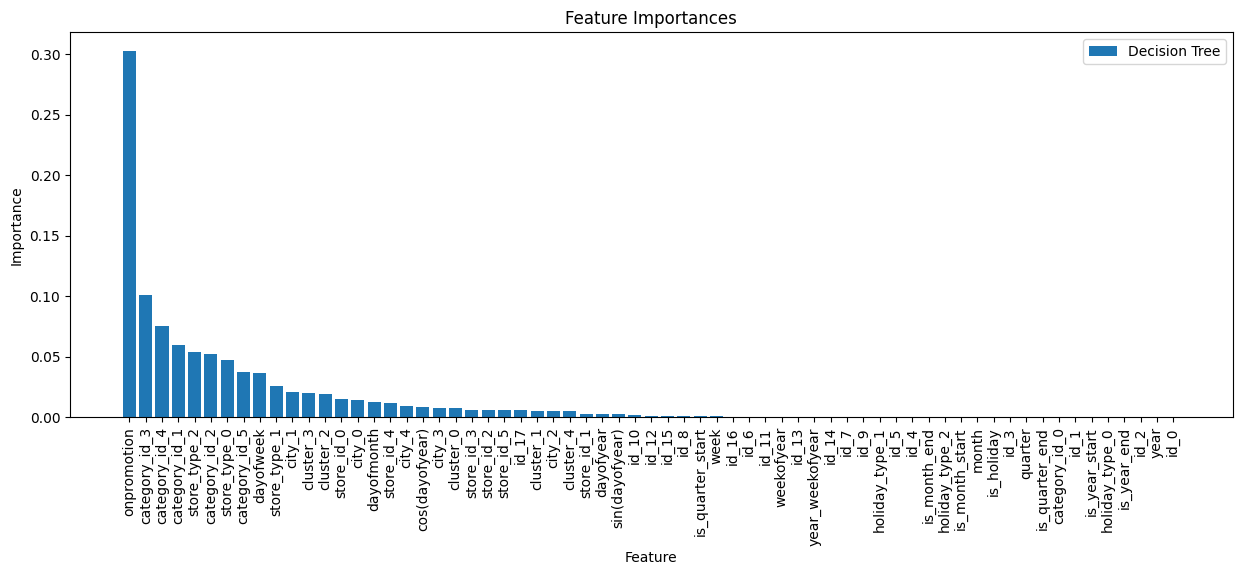

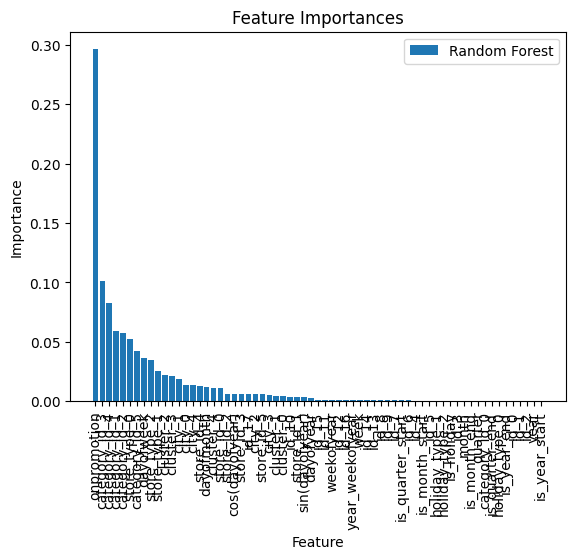

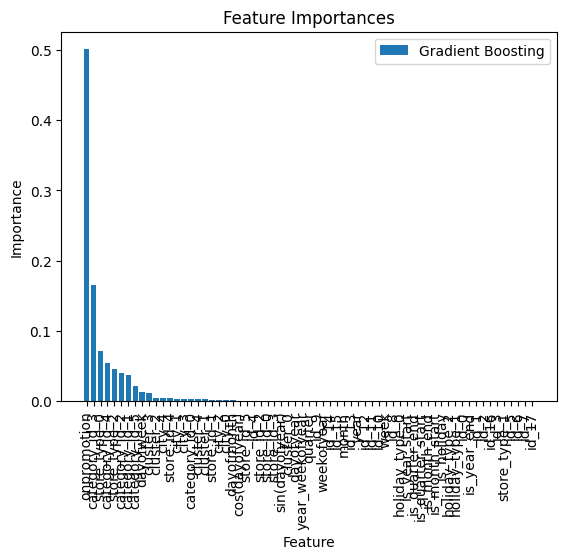

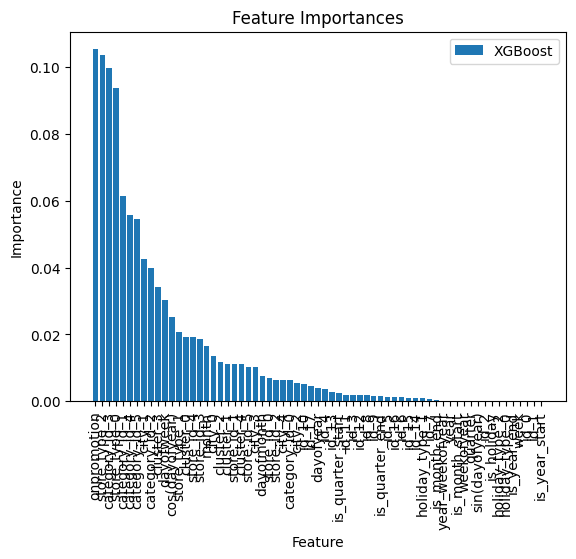

In [ ]:
# import matplotlib.pyplot as plt

# plt.figure(figsize=(15, 5))
# for name, model in models.items():
#     model.fit(X_train, y_train)
#     importances = model.feature_importances_
#     indices = np.argsort(importances)[::-1]
#     plt.bar(range(X_train.shape[1]), importances[indices], align="center", label=name)
#     plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
#     plt.xlabel("Feature")
#     plt.ylabel("Importance")
#     plt.title("Feature Importances")
#     plt.legend()
#     plt.show()


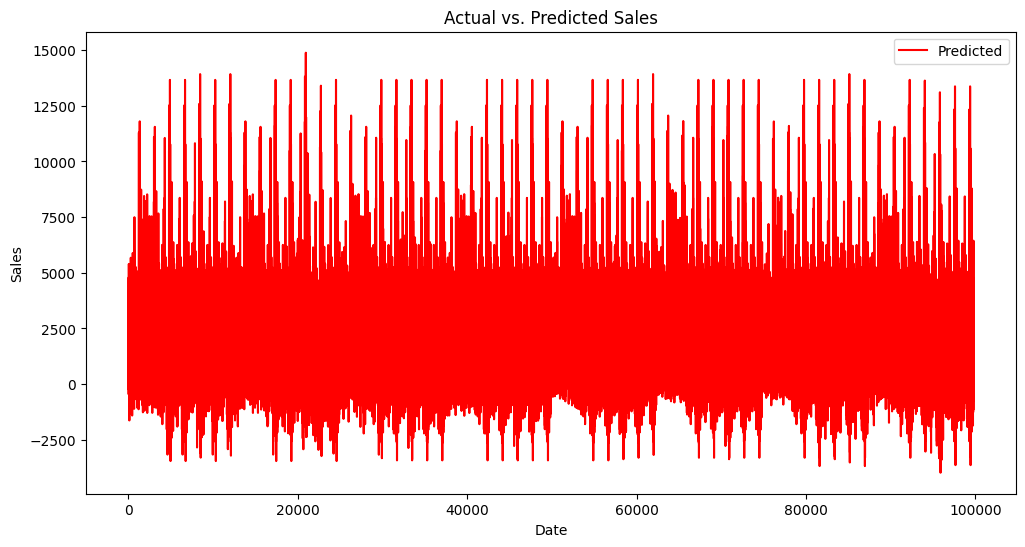

In [ ]:
# plt.figure(figsize=(12, 6))
# plt.plot( y_forecast, label='Predicted', color='red')
# plt.xlabel('Date')
# plt.ylabel('Sales')
# plt.title('Actual vs. Predicted Sales')
# plt.legend()
# plt.show()

In [ ]:
# import pandas as pd

# # Assuming y_forecast is your predicted values
# predictions = pd.Series(y_forecast, name='Predicted_Target')

# # Displaying the predictions
# print(predictions)


0         -51.850971
1          -0.075883
2         -36.496964
3        3523.781006
4         -64.699081
            ...     
99787     769.558289
99788     383.246216
99789    1342.980957
99790    1390.886597
99791      94.037285
Name: Predicted_Target, Length: 99792, dtype: float32


In [ ]:
# # Assuming 'y_test' contains the actual values and 'y_forecast' contains the predictions
# comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_forecast})


ValueError: array length 99792 does not match index length 954129

In [ ]:
y_test.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 954129 entries, 1901-01-01 to 1902-06-18
Series name: target
Non-Null Count   Dtype  
--------------   -----  
954129 non-null  float64
dtypes: float64(1)
memory usage: 14.6 MB


In [ ]:
import joblib
import os

# Define the folder path
folder_path = "your_folder_path_here"

# Create the folder if it doesn't exist
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# Save the models
for name, model in models.items():
    joblib.dump(model, os.path.join(folder_path, f"{name}_model.joblib"))

# Save the encoder
joblib.dump(encoder, os.path.join(folder_path, "encoder.joblib"))

# Save the scaler
joblib.dump(scaler, os.path.join(folder_path, "scaler.joblib"))


In [ ]:
# import joblib

# # Save the models
# for name, model in models.items():
#     joblib.dump(model, f"{name}_model.joblib")

# # Save the encoder
# joblib.dump(encoder, "encoder.joblib")

# # Save the scaler
# joblib.dump(scaler, "scaler.joblib")


['scaler.joblib']